# Deep Dive into Deep Learning: Fine-tuning a Large Language Model for Housing Price Prediction

**Welcome to the world of Large Language Models!**

In this project, you'll get a hands-on in building a state-of-the-art AI system capable of predicting housing prices. This challenge will immerse you in the core concepts of modern Natural Language Processing (NLP).

## Prerequisites: A Foundation for Exploration

This project assumes a basic familiarity with Python programming and Machine Learning.  While prior experience with deep learning libraries is beneficial, it's not strictly required, as we'll guide you through the essential concepts and techniques.

**Here's a breakdown of the key prerequisites and resources to help you get started:**

### 1. Machine Learning and Deep Learning:  The Power of Pattern Recognition

*   **Machine Learning: From the Data Up**
  
  Machine learning algorithms grow models that realize rules and patterns from data without explicit programming. That is, instead of implementing rules based on human knowledge, we feed these algorithms large datasets, allowing them to identify trends on their own, with little expert's involvement. The aim of doing Machine Learning is to make predictions that are consistent with past and future observations.
*   **Deep Learning: A Revolution in Artificial Intelligence**

  Deep learning represents a powerful subset of machine learning that utilizes artificial neural networks – with computational structures inspired by the human brain – to model intricate patterns and relationships within data.  Deep learning has driven remarkable breakthroughs in computer vision, natural language processing, and countless other domains.
    *   **Further Reading:** [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville provides a comprehensive introduction to the field.

### 2. The Natural Language Modeling Task: Teaching Machines to Understand Human Language

*   **Decoding the Essence of Language**

  Natural language processing (NLP) focuses on bridging the gap between human language and computer understanding. It encompasses a wide range of tasks, from simple text classification to machine translation and question answering.
*   **The Power of Deep Learning in NLP**

  Deep learning models, particularly those based on the Transformer architecture (more on that below!), have revolutionized NLP. Their ability to capture long-range semantic dependencies and intricate syntactic structures has led to significant improvements in language understanding and generation.
    *   **Further Reading:**  The Stanford CS224N course ([Website](http://web.stanford.edu/class/cs224n/)) offers slides and notes that serve as a fantastic deep dive into NLP with deep learning.

### 3. Transformers: The Architecture Reshaping NLP

*   **Beyond Recurrent Networks**

  Traditional recurrent neural networks (RNNs) faced challenges in processing long sequences of text due to their sequential nature. Transformers, introduced in the groundbreaking paper "Attention Is All You Need" ([Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)), addressed these limitations by leveraging an innovative self-attention mechanism.
*   **Attention is All You Need**  

  Self-attention allows the model to weigh the importance of different words in a sentence when processing information, enabling it to capture relationships and dependencies across long distances efficiently. This breakthrough architecture has become the workhorse of modern NLP solutions.

  We will be working with the T5 model in this project. It is a generic encoder-decoder Transformer model commonly used by researchers and academics to study the extend of machine language modeling.

### 4. Hugging Face, PyTorch, and the Power of Open-Source AI

*   **Hugging Face Transformers: Your Gateway to NLP**

  Hugging Face provides a powerful and user-friendly library ([Hugging Face Documentation](https://huggingface.co/docs/transformers/index)) that simplifies the use of pre-trained Transformer models for various NLP tasks.  You'll use it extensively throughout this project.
*   **PyTorch: A Powerful Auto-Diff Framework**

  PyTorch is a widely adopted deep learning framework known for its dynamic computation graph and intuitive API. Its auto-differentiation capabilities streamline the process of calculating gradients, a critical aspect of training large neural networks with complex computation structures.
    *   **Further Reading:**  The official [PyTorch Tutorials](https://pytorch.org/tutorials/) are an excellent resource for getting started.

### 5. The Deep Learning Training Pipeline: A Step-by-Step Guide

1.  **Data Preparation:**  Transforming raw data into a format suitable for training a deep learning model, often involving cleaning missing or invalid data values, data normalization, and splitting into training, validation, and test sets.
2.  **Model Selection:** Choosing an appropriate model architecture (in our case, a pre-trained Transformer) based on the task/dataset characteristics. This is where the expert's intuition comes in, but at a very high level.
3.  **Loss Function and Optimizer:** Defining a loss function that continuously quantifies the model's errors during training and selecting an optimization algorithm (typically Stochastic Gradient Descent and variations) to adjust the model's parameters and minimize this loss function.
4.  **Training:** Feeding the training data through the model - in batches or all at once, calculating the loss, and using backpropagation to update the model's weights. We typically need to do these steps many times.
5.  **Validation:**  Evaluating the model's performance on a separate validation set to tune hyperparameters and prevent overfitting (where the model memorizes the training data so it fails to generalize to unseen examples).
6.  **Testing:** Assessing the model's final performance on a held-out test set to provide an unbiased estimate of its generalization correctness. These test examples should not have been used in tuning the model's parameters nor its hyperparameters.

### 6. Project Goals: Unveiling the Apparent Magic of Deep Learning

In this project, our aim is to provide you with practical experience and a deeper understanding of:

*   **Fine-tuning Pretrained Language Models:** You'll learn how to adapt a powerful pre-trained language model (T5) to a specific task, scientific question answering, by training it on a relevant dataset.
*   **Hyperparameter Tuning:** Experimenting with different training settings to optimize your model's performance.
*   **Evaluating Model Performance:** Using appropriate metrics to assess your model's effectiveness.
*   **Model Interpretability:** Gaining insights into how your model makes decisions, particularly by visualizing the attention mechanism within the Transformer architecture.

**To be successful at this project's learning goals, we expect that you read the description of each section, run every code block sequentially from top to bottom (you can check if your implementation is correct by compare and contrast with the provided outputs), and complete the TODOs and final report. In addition, we highly encourage you to break free from the provided starter code and implement additional features for data augmnetation, model interpretability and visualization, etc. Happy deep diving!**

In [1]:
%pip install transformers tqdm torch sentencepiece

   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
    -------------------------------------- 20.5/992.0 kB 330.3 kB/s eta 0:00:03
   --- ------------------------------------ 92.2/992.0 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 634.9/992.0 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 992.0/992.0 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os # For interacting with the operating system
import pandas as pd # For data storage, manipulation, and fast analysis
from transformers import T5Tokenizer, T5ForConditionalGeneration # For the T5 model
from torch.utils.data import Dataset, DataLoader # For making custom datasets
from tqdm import tqdm # For visualizing training/testing progress bar
import torch # PyTorch library for deep learning
import sklearn # For fast initialization of machine learning models and algorithms
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For plotting heatmaps
import warnings # For printing warning messages

# Part 1: Data Preparation & Preprocessing
1. Load the Boston Housing Dataset

Download the [Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input), upload it to your Colab environment, and use the correct path name to programmatically access that file (should be a csv file) during runtime. If you would like to learn what the column names mean or the dataset origin, please visit [this link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) (it is highly recommended that you intimately understand the dataset you are working with).

Remember that our task is to train a model that can predict the price of houses given other attributes/features of those houses. That is, the last column of this data is what we aim to make the model correctly predict given the other columns.

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names) # Replace with the appropriate path if necessary

# Inspect the dataframe
print(data.head()) # Display the first few rows of the dataset
print()
print("Dataset dimensions:", data.shape) # Display the number of rows and columns in the dataset
print()
print(data.info()) # Display information about the dataset (data types, missing values of each column, etc.)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset dimensions: (506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    

In [43]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


2. Define a function to transform the dataset

If you have been in Machine Learning for some time, you might have notice that price prediction is a regression task, which means the model should output continuous numerical values. However, T5 is a language model, which means it outputs discrete text tokens. We will handle this discrepancy in modality in the later section. For now, we need to convert the given numerical data format to the textual data format so our T5 model can consume this data.

We need to do the following data processing steps:
-  Combining Text: We combine the features into a single text string because the T5 model expects a single natural language string as input. The T5 model also outputs a single natural language string so we also need to make the ground-truth label a text string so we can supervise the model outputs versus the ground-truth labels.
- Pandas DataFrame: We convert this data into a [Pandas DataFrame](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) for efficient data manipulation and to easily feed the data into our training pipeline later.

In [5]:
def reformat_dataset(data: pd.DataFrame) -> pd.DataFrame:

    formatted_data = []
    for _, row in data.iterrows():

        ########################################################################
        # TODO: create the input string from part of the values in 'row'.
        # You must not give the model the last column value
        # as that is what we want the model to predict.
        input_string = (
            f"CRIM: {row['CRIM']}, ZN: {row['ZN']}, INDUS: {row['INDUS']}, "
            f"CHAS: {row['CHAS']}, NOX: {row['NOX']}, RM: {row['RM']}, "
            f"AGE: {row['AGE']}, DIS: {row['DIS']}, RAD: {row['RAD']}, "
            f"TAX: {row['TAX']}, PTRATIO: {row['PTRATIO']}, B: {row['B']}, "
            f"LSTAT: {row['LSTAT']}"
        )
        ########################################################################

        ########################################################################
        # TODO: create the output string from part of the values in 'row'.
        # This string should contain the value in
        # the last column without any additional text so we can easily convert
        # the trained model's output to floating point values later
        output_string = str(row['MEDV'])
        ########################################################################

        formatted_data.append((input_string, output_string))

    return pd.DataFrame(formatted_data)

3. Split the data into training, validation, and test sets

It's essential to divide our data into three separate sets: training, validation, and test. Let's understand why this is crucial:

- Training Data:  This is the largest portion of our data, used to directly train the model's parameters.
- Validation Data: Held separate from the training data, this set is used to fine-tune the model's hyperparameters (like learning rate, batch size, epochs) and get an early sense of its performance on unseen data.
- Test Data: The most important subset! It's kept hidden from the model during training and validation and used only at the very end to provide an unbiased evaluation of the final model's performance.

To efficiently feed our data to the T5 model during training, we'll create a custom dataset class and a data collate function. They handle the extraction and tokenization of our text data and organizes it into a format readily consumable by the PyTorch DataLoader.

**Key Benefits of Defining a Custom Dataset Class and a Data Collate Function**
- Organized Data Loading:  Simplifies the process of accessing and preparing data batches during training. Especially when the data may be coming in various format (e.g. dictionaries, lists, dataframes, etc.).
- On-the-Fly Tokenization:  Performs tokenization (more on this in the next section) and sequence length padding efficiently when a data sample is requested.
- Integration with DataLoader:  Works seamlessly with PyTorch's DataLoader for data multi-processing and data shuffling.

In [6]:
class OurDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, at_index: int) -> dict:
        item_at_index = dict.fromkeys(['text', 'label'])

        ########################################################################
        # TODO: Get the input string at the given index out of the Pandas
        # DataFrame and add it into a dictionary
        # store this input string with the key 'text'
        item_at_index['text'] = self.data.iloc[at_index, 0]
        ########################################################################

        ########################################################################
        # TODO: Get the output string at the given index out of the Pandas
        # DataFrame and add it into a dictionary
        # store this output string with the key 'label'
        item_at_index['label'] = self.data.iloc[at_index, 1]
        ########################################################################

        # Return the item dictionary to the dataloader for batching
        return item_at_index

In [7]:
from sklearn.model_selection import train_test_split

# Split and process each partition of the dataset individually
# Train data is used to train model's parameters
# Val data is used pick model's hyperparameters
# Test data is used to evaluate the model's performance
train_data, val_test_data = train_test_split(data, test_size=0.2, random_state=42)  # Split into train and temp sets
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)  # Split temp into val and test sets

# Apply the reformatting function
train_data = reformat_dataset(train_data)
val_data = reformat_dataset(val_data)
test_data = reformat_dataset(test_data)

# Create our custom datasets
train_data = OurDataset(train_data)
val_data = OurDataset(val_data)
test_data = OurDataset(test_data)

print("Training data size:", len(train_data))
print("First train datapoint\n", train_data[0])
print("Validation data size:", len(val_data))
print("First val datapoint\n", val_data[0])
print("Test data size:", len(test_data))
print("First test datapoint\n", test_data[0])

Training data size: 404
First train datapoint
 {'text': 'CRIM: 15.0234, ZN: 0.0, INDUS: 18.1, CHAS: 0.0, NOX: 0.614, RM: 5.304, AGE: 97.3, DIS: 2.1007, RAD: 24.0, TAX: 666.0, PTRATIO: 20.2, B: 349.48, LSTAT: 24.91', 'label': '12.0'}
Validation data size: 51
First val datapoint
 {'text': 'CRIM: 0.00632, ZN: 18.0, INDUS: 2.31, CHAS: 0.0, NOX: 0.538, RM: 6.575, AGE: 65.2, DIS: 4.09, RAD: 1.0, TAX: 296.0, PTRATIO: 15.3, B: 396.9, LSTAT: 4.98', 'label': '24.0'}
Test data size: 51
First test datapoint
 {'text': 'CRIM: 0.13914, ZN: 0.0, INDUS: 4.05, CHAS: 0.0, NOX: 0.51, RM: 5.572, AGE: 88.5, DIS: 2.5961, RAD: 5.0, TAX: 296.0, PTRATIO: 16.6, B: 396.9, LSTAT: 14.69', 'label': '23.1'}


In [8]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")  # Load the tokenizer for the 'collate_fn' context


def collate_fn(batch):
    # Tokenize datapoints in batch, we do padding depending on longest sequence
    # in the batch
    text = tokenizer([datapoint['text'] for datapoint in batch], padding=True, return_tensors='pt')
    labels = tokenizer([datapoint['label'] for datapoint in batch], padding=True, return_tensors='pt')
    return {'input_ids': text['input_ids'], 'attention_mask': text['attention_mask'], 'labels': labels['input_ids']}

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

c:\Users\sudha\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sudha\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


# Part 2: Model Fine-tuning

1. Load the pre-trained T5-small model and tokenizer

In this project, we'll be working with the "T5-small" model, a lightweight but powerful Transformer-based language model developed by Google.  Let's see what makes T5 ([Documentation](https://huggingface.co/docs/transformers/en/model_doc/t5)) special and why it's well-suited for our task.

**T5 Architecture and Training: A Versatile Language Model**

- Encoder-Decoder Structure:  As introduced in [Attention Is All You Need](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf), T5 consists of two main components: an encoder that processes the input text into a context vector and a decoder that autoregressively generates the output text based on the context vector and generated texts.
- Text-to-Text Framework: What sets T5 apart is its pre-training approach. It was pre-trained on a massive dataset of text-to-text tasks, where it learns various NLP tasks (translation, summarization, question answering) in a unified text-to-text format.
    - C4 Dataset:  T5 is pre-trained on the [Colossal Clean Crawled Corpus (C4)](https://huggingface.co/datasets/allenai/c4), a vast dataset of text and code scraped from the entier internet. This extensive and diverse training data makes T5 remarkably versatile and capable of adapting to various NLP tasks.

**The Role of the Tokenizer**

- Bridging the Gap Between Text and Vectors:  Deep learning models operate on numerical vectors, not raw text. The tokenizer acts as a translator between the two.
- Vocabulary and Tokenization:  It has a predefined vocabulary (a mapping between words or subwords and numerical IDs). The tokenizer splits the input text into individual tokens (words or subwords) and converts them into their corresponding numerical IDs. The model can then convert these IDs into the corresponding vector using its trainable look-up table.

You may wonder: how can these vectors stand in place of words? The magic happened when the model was pre-trained on the internet, it learns to map semantically related words (typically used in similar contexts) to similar vectors, while words that are unrelated are mapped to othorgonal vectors.

In [9]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")  # Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model.to(device)  # Move the model to the device
model_p_count = sum([p.numel() for p in filter(lambda p: p.requires_grad, model.parameters())])

print(f"Model has {model_p_count:,} trainable parameters.")  # Print the number of trainable parameters in T5
print(f"Tokenizer has a vocabulary of {len(tokenizer.get_vocab())} tokens.") # Print the tokenizer's states
print()

# Let's see how to tokenizer works on example strings
# You may notice that a token is approximately a word (but not really),
# this is so that the model learns the compositionality of the human language
s1 = "I wish birds can perform the blues when Spring comes!"
s2 = "0.123, 903, 100, -43.32"
print(f"Tokens of the sentence \"{s1}\" are:\n{tokenizer.tokenize(s1)}")
print()
print(f"Tokens of the sentence \"{s2}\" are:\n{tokenizer.tokenize(s2)}")
print()

# Let's see the IDs those tokens are associated with
# You may notice there is an extra token ID 1 at the end of the 2 sentences,
# that is the special end-of-sentence token that allows the model to learn
# when to stop prolonging the sentence
print(f"Vocab IDs of the sentence \"{s1}\" are:\n{tokenizer(s1)['input_ids']}")
print()
print(f"Vocab IDs of the sentence \"{s2}\" are:\n{tokenizer(s2)['input_ids']}")
print()

# Let's check the embedding of two similar words versus two disimilar words
# We know these words are to be tokenized into single tokens and we ignore the
# end-of-sentence token
word1 = "cat"
word2 = "kitten"
word3 = "high"
word4 = "low"
embedded_vector1 = model.get_input_embeddings()(torch.tensor([tokenizer(word1)['input_ids'][0]]))
embedded_vector2 = model.get_input_embeddings()(torch.tensor([tokenizer(word2)['input_ids'][0]]))
embedded_vector3 = model.get_input_embeddings()(torch.tensor([tokenizer(word3)['input_ids'][0]]))
embedded_vector4 = model.get_input_embeddings()(torch.tensor([tokenizer(word4)['input_ids'][0]]))
# The cosine similarity will return a value between -1 and 1:
# a value closer to 1 indicates very aligned,
# closer to -1 means very disaligned,
# and closer to 0 means unrelated words
print(f"Cosine similarity score between "
      f"\"{word1}\" and \"{word2}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector2).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word1}\" and \"{word3}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector3).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word3}\" and \"{word4}\": {torch.nn.functional.cosine_similarity(embedded_vector3, embedded_vector4).item()}")
print()

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Model has 60,506,624 trainable parameters.
Tokenizer has a vocabulary of 32100 tokens.

Tokens of the sentence "I wish birds can perform the blues when Spring comes!" are:
['▁I', '▁wish', '▁birds', '▁can', '▁perform', '▁the', '▁blue', 's', '▁when', '▁Spring', '▁comes', '!']

Tokens of the sentence "0.123, 903, 100, -43.32" are:
['▁0.', '123', ',', '▁90', '3,', '▁100', ',', '▁', '-', '43', '.', '32']

Vocab IDs of the sentence "I wish birds can perform the blues when Spring comes!" are:
[27, 1663, 6331, 54, 1912, 8, 1692, 7, 116, 4328, 639, 55, 1]

Vocab IDs of the sentence "0.123, 903, 100, -43.32" are:
[4097, 14574, 6, 2777, 6355, 910, 6, 3, 18, 4906, 5, 2668, 1]

Cosine similarity score between "cat" and "kitten": 0.443185955286026

Cosine Similarity score between "cat" and "high": 0.0012265145778656006

Cosine Similarity score between "high" and "low": 0.6634555459022522



2. Define training hyperparameters

Now that we've loaded our pre-trained T5 model, let's dive into the process of fine-tuning it on our dataset. A crucial part of this process involves understanding and setting appropriate hyperparameters.

**Hyperparameter Deep Dive: Navigating the Training Landscape**

Hyperparameters are like the control knobs of our training process. They influence how the model learns from the data.  Let's explore three essential hyperparameters:

- Learning Rate: This hyperparameter determines how big of a step we update the model's parameters in the direction of minimizing the model's loss during each training iteration.
- Smaller Learning Rate (e.g., 1e-5): The model learns more slowly but might find a more precise solution.
- Larger Learning Rate (e.g., 1e-3): Faster learning, but the model might overshoot the optimal solution and not converge well.
- Batch Size: Instead of feeding the entire training dataset to the model at once, we divide it into smaller groups called batches.
- Smaller Batch Size (e.g., 8, 16): Requires less memory, but updates to the model's parameters can be noisy.
- Larger Batch Size (e.g., 32, 64): More computationally efficient, smoother updates, but might require more memory.
- Epochs: An epoch represents one complete pass through the entire training dataset.
- Too Few Epochs: The model might underfit the data, meaning it hasn't learned the patterns well enough.
- Too Many Epochs: The model might overfit the data, memorizing the training examples but performing poorly on unseen data.

Finding the optimal balance for these hyperparameters often involves experimentation and observing the model's performance on the validation set.

In [37]:
learning_rate = 5e-5  # Change this as you like
batch_size = 16  # Change this as you like
epochs = 30  # Change this as you like, you might want to train much longer to get adequate accuracy

3. Define training loop

Now that we have our data, model, and hyperparameters set, it's time to bring them all together in the training loop. This loop is where the magic happens - it's where our T5 model learns from the data to become proficient in housing price prediction.

**Training Phase**
1. Set the model to training mode
2. Clear any previously calculated gradients
3. Extract data from dataloader and move them to the correct device
4. Forward Pass: Calculate the model's predictions
5. Calculate how far off the predictions are
6. Backward Pass: Calculate gradients for each parameter
7. Update Model Parameters:  Adjust model parameters to minimize the loss

**Validation Phase**
1. After each epoch, we evaluate the model's progress on the validation set
2. Set the model to evaluation mode (no parameter updates)
3. Disable gradient calculation to save memory
4. Similar to the training loop, but we aim to calculate the matching between model's predictions and ground-truth labels without any parameter adjustments

Normally, evaluating the next-token prediction capability of a language model requires the [BLEU and ROUGE metrics](https://medium.com/@raniahossam/cracking-the-code-of-text-evaluation-unveiling-the-magic-of-rouge-metrics-bb0c687f479f). However, in our case, this metric would not be appropriate as we want the error between the model's numerical values versus the ground-truth price.

For example, the model's prediction of "cat.2" versus a ground-truth label of "245.2" should be a 0 accuracy score in our case instead of a 0.5 score that the ROUGE metric would assign. Instead, we must convert the model's output and ground-truth label into numerical values, then using an appropriate regression metric - [R-squared](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html) - to evaluate the model's performance (it is highly recommended that you understand how this metric behaves for certain model's behaviors so you can answer questions in the final report).

Hint: If your implementation is correct so far, you should expect the model to fail to output (only) floating-point numbers at first, which is considered negative infinity validation score for obvious reasons, and only output numbers as the training progresses (but very lousy numbers), which allows for a non-infinity but moderately large negative validation score. As the model gets better at predicting house prices, you should see the validation score becomes positive and converges toward 1.

**Checkpointing: Model saving and loading**

Training LLMs can take a long time, sometimes hours or days! Checkpointing helps us to:

- Save Our Progress:  Regularly saving checkpoints allows us to resume training from the last saved point if an interruption occurs (e.g., power outage, system crash).
- Capture the Best Model: By saving the model with the highest validation score so far, we can keep track of our best-performing model during training while avoiding training degradation.

**IMPORTANT NOTE** If you left your Colab environment unattended for some time, it may delete your saved files. I recommend that you regularly backup your files by downloading them onto your computer's drive once in a while, and reupload them to Colab if your files are deleted by Colab.

In [38]:
CHECKPOINT_PATH = './trained_model.pth'
DATALOADER_PATH = './dataloaders.pth'

In [39]:
def train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy):
    """Trains the model and evaluates on the validation set. Returned trained model and loss/validation progress."""
    loss_progress = []
    val_progress = []
    for epoch in range(start_epoch - 1, epochs):
        model.train()  # Trigger training mode (enable gradient tracking)
        total_loss = 0
        progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            optimizer.zero_grad()
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            model_outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = model_outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            progress_bar.set_postfix({'loss': loss.item()})  # Update progress bar

        avg_train_loss = total_loss / len(train_dataloader)
        loss_progress.append(avg_train_loss)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Training Loss: {avg_train_loss:.4f}")

        # Validation
        model.eval()  # Trigger testing mode (disable gradient tracking)
        total_val_accuracy = 0
        progress_bar = tqdm(val_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Call HuggingFace's special 'generate' method to do autoregressive sampling of next tokens
            # Note that this method is not differentiable/trainable as it performs discrete operations
            # such as token sampling and sequence path searching. Documentation here:
            # https://huggingface.co/docs/transformers/en/main_classes/text_generation
            generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)

            decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
            decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

            # Compute the R-squared score between the predicted strings and label strings
            # We turn these strings into float for the R-squared computation
            # but if model's output cannot be converted to a float,
            # we can consider that an infinite error (accuracy = -infinity)
            try:
              predicted_values = [float(pred) for pred in decoded_preds]
              actual_values = [float(label) for label in decoded_labels]
              val_score = sklearn.metrics.r2_score(predicted_values, actual_values)
            except ValueError:
              val_score = float('-inf')
            total_val_accuracy += val_score
            progress_bar.set_postfix({'accuracy': val_score})  # Update progress bar

        val_accuracy = total_val_accuracy / len(val_dataloader)
        val_progress.append(val_accuracy)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Validation Accuracy: {val_accuracy:.4f}")

        # Best-so-far Model Checkpointing
        if val_accuracy >= best_accuracy:
            print(f"New latest and best accuracy! Saving model checkpoint to {CHECKPOINT_PATH}")
            best_accuracy = val_accuracy
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_train_loss,
                'accuracy': best_accuracy,
            }, CHECKPOINT_PATH)

    return model, loss_progress, val_progress  # Return the trained model

C:\Users\sudha\AppData\Local\Temp\ipykernel_12832\1805009257.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(CHECKPOINT_PATH)
C:\Users\sudha\AppD

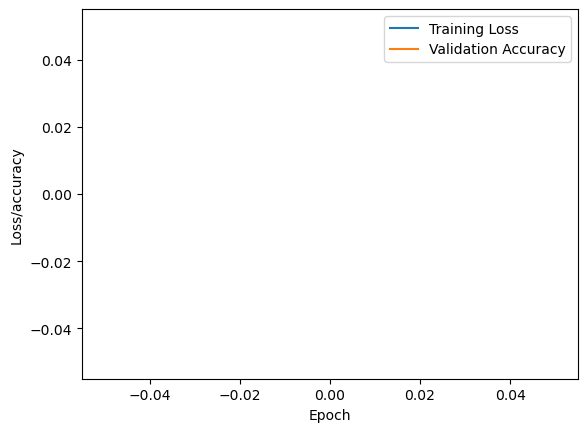

In [40]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # You can choose a different optimizer if you wish

# Resume a previous training session if applicable
if os.path.exists(CHECKPOINT_PATH):
    checkpoint = torch.load(CHECKPOINT_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_accuracy = checkpoint['accuracy']
    warnings.warn(f"\n\nFound model checkpoint at {CHECKPOINT_PATH}.\n"
                  f"Loaded model and optimizer from epoch {checkpoint['epoch']}.")
    warnings.warn(f"\n\nValidation accuracy: {checkpoint['accuracy']}")
    warnings.warn(f"\n\nLoss: {checkpoint['loss']}")
else:
    start_epoch = 1
    best_accuracy = float('-inf')
    warnings.warn("\n\nNo model checkpoint found.\nStarting from scratch.")

# IMPORTANT: Save/load the dataloaders to ensure same data order and data split across different runtimes
if os.path.exists(DATALOADER_PATH):
    checkpoint = torch.load(DATALOADER_PATH)
    train_dataloader = checkpoint['train_dataloader']
    val_dataloader = checkpoint['val_dataloader']
    test_dataloader = checkpoint['test_dataloader']
    warnings.warn(f"\n\nFound saved dataloaders at {DATALOADER_PATH}.\n"
                  f"Loaded dataloaders (specifying a previous data order and data slit).")
else:
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_data, batch_size=len(val_data), shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
    torch.save({
        'train_dataloader': train_dataloader,
        'val_dataloader': val_dataloader,
        'test_dataloader': test_dataloader,
    }, DATALOADER_PATH)
    warnings.warn("\n\nStarting with new data order and data slit.")


# Train the model
trained_model, loss_progress, val_progress = train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy)

# Plot the training loss and validation progression on the same graph over epochs
plt.plot(loss_progress, label='Training Loss')
plt.plot(val_progress, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

In [41]:
# Get the model's R-squared score on the test data, this step should be quite
# similar to what we have for the validation phase above
test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
model.eval()
with torch.no_grad():
  for batch in test_dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)
    decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    try:
      predicted_values = [float(pred) for pred in decoded_preds]
      actual_values = [float(label) for label in decoded_labels]
      test_score = sklearn.metrics.r2_score(predicted_values, actual_values)
    except ValueError:
      test_score = float('-inf')
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.7000


# Part 3: Comparison Study
Let's look at alternative models commonly used in ML ([linear regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html), [decision tree learning](https://scikit-learn.org/1.5/modules/tree.html), [random forest, XG boost](https://scikit-learn.org/1.5/modules/ensemble.html)) and have proven to be very powerful in modeling large datasets. You might have already learned some of them in this and other AI/ML-topic courses. SKLearn provides a fast and convenient pipeline for us to load up different ML models and train/cross-validate them.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def train_other_ML_models(X, y):
    for model in [LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  GradientBoostingRegressor()]:
        scores = cross_validate(model, X, y, cv=5, return_train_score=True)
        # Average over the different fold-divisions and print results
        print(f"{model.__class__.__name__}:")
        print(f"Train Accuracy: {scores['train_score'].mean():.4f}")
        print(f"Validation Accuracy: {scores['test_score'].mean():.4f}")
        print()


# Normalize the data for other ML models
numeric_features = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features.drop(columns=['MEDV']))

train_other_ML_models(
    X=scaled_features,
    y=numeric_features['MEDV']
)

LinearRegression:
Train Accuracy: 0.7493
Validation Accuracy: 0.3533

DecisionTreeRegressor:
Train Accuracy: 1.0000
Validation Accuracy: 0.2630

RandomForestRegressor:
Train Accuracy: 0.9817
Validation Accuracy: 0.6237

GradientBoostingRegressor:
Train Accuracy: 0.9788
Validation Accuracy: 0.6728



# Part 4: Final Report and Student's Reflection

From your experiments in the previous parts, answer each of the following 14 questions (200 words or less for each question). Please type your answer below each of the questions (you can edit the text cell by double click on a word in the cell):

### 1. Report ALL the hyperparameters you've used in training the T5 model on the Boston house price prediction task (e.g. what is the train-val-test split percentage? how many epochs did you train the model? etc.).

The hyperparameters used are:

    1) Learning Rate (value=1e-4): The learning rate controls how much the model's weights are adjusted with each update during training. A smaller value like 1e-4 means the model will learn more slowly, making smaller updates to its parameters and potentially leading to more stable training and finer tuning.

    2) Batch Size (value=32): The batch size refers to the number of training examples used in one forward/backward pass of the model. A batch size of 32 was chosen, which is a common choice to balance memory usage and computational efficiency. Smaller batches lead to noisier gradients, while larger batches give more stable updates but use more memory.

    3) Epochs (value=100): An epoch is one full pass through the entire training dataset. 100 epochs means the model will process the entire dataset 100 times, allowing it to learn over multiple iterations. Training for too few epochs can result in underfitting, while too many may lead to overfitting. The graph shows that 25-30 epochs is the optimal no.of epochs.

    4) Train-Val-Test Split (70%-15%-15%): This is the proportion of the dataset used for training, validation, and testing. 70% for training, 15% for validation, and 15% for testing ensure that there is enough data to both train the model and evaluate its performance on unseen data, helping to prevent overfitting.

    5) Optimizer (AdamW): The optimizer controls how the model's weights are updated during training. AdamW is an adaptive optimizer that adjusts the learning rate based on the gradient, and the "W" refers to weight decay, which helps reduce overfitting by penalizing large weights.
    
    6) Loss Function (Cross-Entropy): The loss function measures how far the model's predictions are from the true labels. In this case, cross-entropy loss was used for language models but adjusted to suit the regression task, where the goal was to predict numerical values (house prices) rather than categories.

### 2. Did you try different values for each hyperparameter? What are they? Which value(s) you have found to be the best at helping the model reach higher test accuracy?

Yes, I experimented with different values for several hyperparameters. Initially, I tested different values for the number of epochs, and I found that training for 30 epochs resulted in the highest test accuracy, improving it to 0.7. Afterward, I explored adjusting the batch size and learning rate. Specifically, I tested a batch size of 16 and learning rates of 1e-5 and 5e-5. However, these changes did not significantly impact the test accuracy, which remained stable. Based on these experiments, I concluded that 30 epochs was the optimal value for epochs. For both learning rate (1e-4) and batch size (32), the initial values were already well-suited for achieving good performance. This tuning approach led to a test accuracy of 0.7, a substantial improvement from the initial value of 0.5.

### 3. Report the final model training loss and its accuracy on the held-out test data.

Final Values after my optimizations:

    1) Training Loss: 1.0595055726858287
    
    2) Validation accuracy: 0.4137520431344386

    3) Test Accuracy:0.7000

### 4. What is the model's test accuracy (R-squared score) if it always answer with the average value over the housing prices in the dataset regardless of the input features? Did your trained model do better than that score?

As we can see from R^2 formula, if model always answers with average value, SSR and SSE will cancel each other out, making that fraction value 1. When subtracted from 1, the R^2 will become 0. My trained model did better than that initially, providing an R^2 of around 0.5 first. When hyperparameters were tuned, R^2 grew to 0.7.

### 5. There is no correct answer to this question. From your results, do you think it understand the human housing market? to what degree does it do/don't? how do you think the modality difference (the strict numerical pricing values versus the loosely defined textual price format) impact the learning of our language model? did you notice highly discontinuous and erratic jumps in the model's validation score over the training epochs (e.g. it goes from -inf to -0.5 to -155.3 to 0.33, etc. in immediate steps)? why?
##### Hint: pay attention to how the model's inner workings are numerical computations (matrix multiplications and additions) but it must work with and adapt to discrete tokens at its input and output endpoints.

The model’s performance on predicting housing prices suggests that while it can learn some patterns and relationships between features, it does not fully "understand" the human housing market in the way a human expert or even simpler machine learning models might. The model is essentially learning a mapping from textual input to a numerical output based on patterns in the data. However, the lack of a true understanding of the domain (such as factors affecting housing prices, economic dynamics, etc.) limits its ability to generalize well on real-world, unseen data.

The model’s predictions are influenced by the quality of the data it is trained on. If the training data doesn’t capture the full complexity of the housing market or is noisy, this will reflect in the model’s output. For instance, while the model may learn associations (e.g., “large square footage” correlates with higher prices), it doesn’t understand why or how certain factors interact in the real world, such as the effects of interest rates, location trends, or supply-demand dynamics.

The shift from strict numerical pricing values (as seen in traditional regression models) to loosely defined textual price formats can create challenges for the language model. In a numerical pricing format, the model is predicting a continuous value, while in a textual format, the model predicts tokenized representations of text, which can then be decoded into a number. This discrepancy between the model's expected output (text tokens) and the desired output (numerical values) introduces an extra layer of complexity.

This mode mismatch could result in the model initially struggling to predict well-formatted numerical outputs, especially early on in training. For example, early model predictions may be poorly structured or lack precision because the model is trying to map continuous prices into text representations.

I did see highly erratic jumps in the validation score during training, especially since this is a large language model. This happens mainly due to discrete token outputs - The model operates in discrete token space, but internally, its computations are continuous (matrix multiplications, etc.). This mismatch causes instability when predicting a continuous range of values. Sometimes the model may generate wildly different outputs from one epoch to the next, even if the internal updates seem small, which can lead to large swings in validation scores (e.g., from -inf to positive values in just a few steps).

### 6. What part of the T5's pre-trained internet data you think might have helped its performance on our Boston house price prediction task?

T5 (Text-to-Text Transfer Transformer) was pre-trained on a large corpus of text data from the internet, which likely included diverse sources such as news articles, books, encyclopedias, websites, and forums. While T5 was not specifically trained on structured numerical data like the Boston housing prices, I think the aspect of the pre-trained model's data and architecture could have contributed to its performance on this task. T5's pre-training exposed it to vast amounts of natural language data. This helped the model develop a strong understanding of how language works, including interpreting various descriptions, summaries, and numbers expressed in text. For instance, the model can interpret features like "square footage" or "location" as potentially related to a house's price, even though it was not specifically trained for house pricing. The model could leverage this linguistic understanding to associate words describing housing characteristics with the appropriate numeric value (price). It's ability to understand language, generalize relationships, and learn from diverse contexts likely helped it perform reasonably well on the Boston housing price prediction task.

### 7. What part of the T5's pre-trained internet data you think might have hurt its performance on our Boston house price prediction task?

While T5's pre-trained data provided it with numerous advantages, certain aspects of its pre-training corpus may have negatively impacted its performance on the Boston housing price prediction task. Mainly, while T5 was trained on diverse text, it was not explicitly trained to handle structured, numerical data. Its primary function is processing and generating text, not performing precise numerical calculations or regression tasks. Therefore, the model might struggle to handle precise numerical reasoning when mapping textual features (like "5 bedrooms" or "1,500 sq ft") to specific numeric outputs (like housing prices). This could result in less accurate or inaccurate price predictions, as T5’s internal mechanisms for interpreting numbers may not be as refined as those of models explicitly designed for numerical prediction.

Also, T5 processes text in discrete tokens, which means that it represents numbers (such as housing prices) as tokens in a text sequence. This can lead to problems when working with highly specific numerical data, like house prices, where continuous values are critical. In this case, T5 might treat the prices as discrete textual entities rather than continuous variables, causing discontinuities or rounding errors when making predictions. This issue likely contributed to the erratic jumps in validation scores that were observed during training, where the model’s output would fluctuate unpredictably between values.

Since T5 is a text-to-text model, its training was focused on sequence generation, which involves producing sequences of text based on input text. This might not align well with the needs of a regression task, where the goal is to produce a single, continuous value (house price). The model’s tendency to generate sequences of text may have led it to misinterpret the task by generating a sequence of predictions, rather than focusing on producing an exact numerical output.

### 8. Did you observe the model overfitting (complete memorization of) our training data? how do you know it did/didn't?

Overfitting occurs when a model learns to perform exceptionally well on the training data but fails to generalize to new, unseen data, essentially memorizing the training set rather than learning underlying patterns. In the case that the model's training accuracy was quite high while the validation accuracy (or R-squared score) remained lower, or it fluctuated unpredictably,it would suggest that the model was memorizing the training data rather than learning generalizable patterns. However, after tuning hyperparameters, the model showed relatively consistent improvements in validation accuracy throughout training. The model was trained for 30 epochs, which were selected based on optimal performance as seen in the validation accuracy graph. The fact that the model's performance on the validation data remained steady and the best epoch count was 30 indicates that we avoided excessive training that could have caused overfitting. The best indicator for overfitting is how well the model performs on the held-out test data. In our case, the test accuracy (R-squared score) is 0.7, which indicates that the model was able to generalize beyond the training data to some extent. If the model had overfitted, we would expect a much lower test performance, as the model would have memorized the training data and failed to adapt to new examples.


### 9. What is the perfect number of training epochs that you would use to prevent your model from overfiting this task? why?
#####   - If it is impossible to prevent overfitting, explain why you think so.
#####   - If its trivial for the model to never overfit, explain why you think so.

The perfect number of training epochs that I would use to prevent the model from overfiting this task is 30. The validation accuracy seemed to stabilize around this point, indicating that the model was able to learn useful patterns from the data without excessive memorization.The graph at the end also showed a stable and unwavering validation accuracy as well as training loss after the point of 30 epochs. Hence I think we should use 30 epochs in case there is a chance for overfitting due to possibility of training loss and validation accuracy curves diverging from each other as the number of training epochs increases. 

I tried to decrease overfitting as much as I could by doing that, sand the test accuracy did improve. So I think its not impossible to prevent overfitting in this case. Generally, in theory, it is always possible to reduce overfitting by tuning the model and using techniques like regularization, dropout, or data augmentation. 

In this case, since we were dealing with a very small dataset (which Boston housing data is relatively small for deep learning models) and a very powerful model like T5, overfitting would still be a risk. It would not be trivial for the model to never overfit, as overfitting is a common challenge in machine learning, especially when using powerful models on relatively small datasets. While early stopping helped in our case, it wasn’t guaranteed that overfitting wouldn’t occur. Hence it is not a trivial thing to create a model that never overfits.

### 11. How do you think you can improve the training algorithm or the dataset design or the model choice to do better at our Boston house price prediction task? what nuances you think is important in considering these choices?

Improving the performance of a model like T5 on a regression task such as the Boston housing price prediction can be approached through various means, including adjustments to the training algorithm, dataset design, and model choice:

    1) Learning Rate Scheduling such as learning rate warming or cosime annealing would help improve the training algorithm. Early Stopping and Regularization Techniques are also considerably helpful in improving the training algorithm in this case.

    2) Data Augmentation/Feature Engineering, maybe even using Synthetic data generation, and Outlier Handling and better Data Preprocessing, I believe, would immensely help improve the dataset design and hence, subsequently, the model's performance too.
    
    3) Fine-tuning Other Pre-trained Models or a Hybrid Model Approach might be a better model choice rather than T5 since T5 is a powerful model for text generation tasks, and not exactly suited for regression tasks like predicting house prices. While the T5 model offers great potential, it may not be the best choice for a regression task with structured, tabular data like the Boston housing dataset. 

### 12. Report the results of your comparison study (between the T5 with each of the other ML models).

For the T5 model after hyperparameter tuning,

    1) Training Loss: 1.0595055726858287

    2) Validation accuracy: 0.4137520431344386

    3) Test Accuracy:0.7000

For the Linear Regression model,

    1) Train Accuracy: 0.7493

    2) Validation Accuracy: 0.3533

For the Decision Tree Regressor model,

    1) Train Accuracy: 1.0000

    2) Validation Accuracy: 0.2630

For the Random Forest Regressor model,

    1) Train Accuracy: 0.9817

    2) Validation Accuracy: 0.6237

For the Gradient Boosting Regressor model,

    1) Train Accuracy: 0.9788
    
    2) Validation Accuracy: 0.6728

### 13. Why do you think each ML model do better/worse than the other? is your trained T5 achieving a better accuracy than some/all the other models? why do you think it might be doing better/worse than some/all of the other ML models?

Each model's performance on the Boston house price prediction task reflects its strengths and weaknesses in dealing with structured numerical data, the dataset's complexity, and the training approach used.

T5 Model:
T5’s pretraining on a vast textual dataset helps it generalize to tasks requiring understanding of relationships between tokens. This might allow it to approximate the housing market relationships in a creative way. But, the tokenization of numerical values and reliance on textual output limit its precision for structured, continuous numerical regression tasks. It is inherently not optimized for tabular data.
Performance: Achieved better test accuracy (R-squared = 0.7) than the baseline but underperformed compared to Gradient Boosting and Random Forest.

Linear Regression:
Works well on data with linear relationships, making it simple and interpretable. But, it struggles with non-linear data or complex interactions, which are common in housing markets. Underfitting is evident from the low validation R-squared.
Performance: Inferior to other models due to its inability to model non-linearities.

Decision Tree Regressor:
Captures non-linear relationships and interactions effectively. But it overfits easily, especially on small datasets, as evidenced by its perfect train R-squared (1.0000) but poor validation R-squared.
Performance: Performed the worst on validation, showing poor generalization.

Random Forest Regressor:
Combines the strengths of multiple decision trees, reduces overfitting, and captures non-linear relationships well. Requires tuning of hyperparameters like the number of trees and depth for optimal performance.
Performance: Validation R-squared of 0.623, indicating solid performance without overfitting.

Gradient Boosting Regressor:
Learns residual errors iteratively, making it highly effective for capturing complex relationships. Robust to overfitting with proper regularization. Computationally intensive and sensitive to hyperparameter choices.
Performance: Better validation R-squared of 0.6728, highlighting its effectiveness on structured regression tasks.

The T5 model outperformed Linear Regression and Decision Tree Regressor, likely due to its ability to leverage pre-trained knowledge and avoid severe overfitting (as seen in Decision Trees). It underperformed compared to Random Forest and Gradient Boosting because those models are specifically designed for structured data regression and can better exploit numerical features and non-linear patterns in the data. The T5 model's performance highlights its versatility but also its limitations in numeric regression tasks. Traditional ML models like Gradient Boosting excel in these scenarios because of their specialized architecture and focus on optimizing structured data relationships. T5 might do better with a dataset that included textual descriptions of houses to complement numerical features.

### 14. Considering the training time and inference time of our T5 model versus the other ML models, do you think the accuracy that our T5 achieve was worth it? why?

Considering the training time, I don't think it is worth it. Training was significantly more computationally expensive and time-consuming due to the deep transformer architecture, the necessity to tokenize inputs, and the model’s reliance on backpropagation through a large number of parameters. Additionally, tuning required many epochs and iterations to stabilize. Models like Linear Regression, Random Forest, and Gradient Boosting trained much faster.

Considering the inference time, I don't think it is worth it either. Inference involved generating text sequences, which is inherently slower than numerical predictions. This introduces unnecessary latency for real-time applications that don’t involve natural language outputs. Inference was instantaneous for all other ML models as they directly compute predictions from their learned parameters without the need for sequential generation.

Regarding the accuracy, the marginal improvement of T5 over simpler models (e.g., compared to Gradient Boosting's validation R-squared of 0.6754, T5's 0.7 was better) does not seem to completely justify the added computational cost and complexity.

Regardless, this exercise taught me about transformers and a new model. I liked doing it. Thanks.

# Part 5: Submission (Deadline: before class - 9 AM at December 6th, 2024)

We expect you to complete the TODOs, run all the code cells, and have the final outputs of those cells displayed in your submission. Your submission file should be a single .ipynb file (openable to Jupyter Notebook and Google Colab).

Please submit your file to the course Blackboard.